Which year of data do you want to graph(integer between 1850 and 2022) 1850


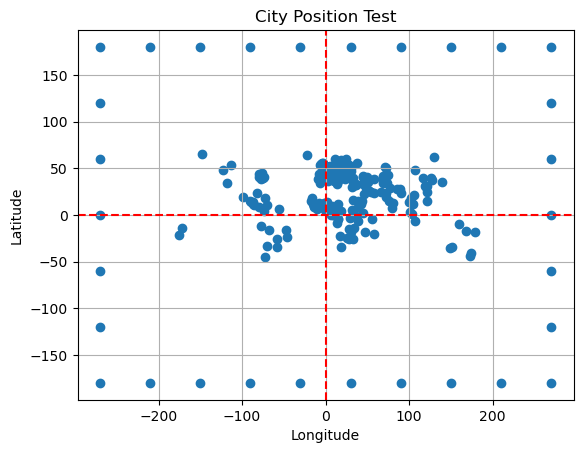

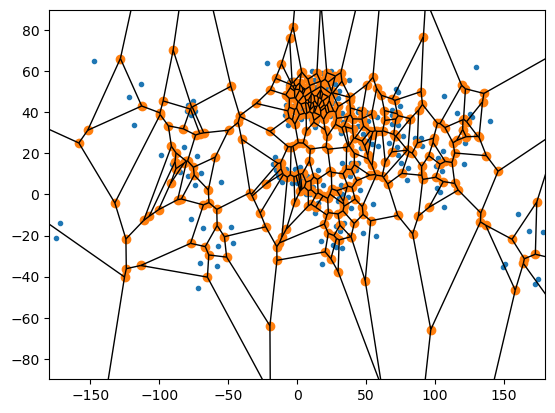

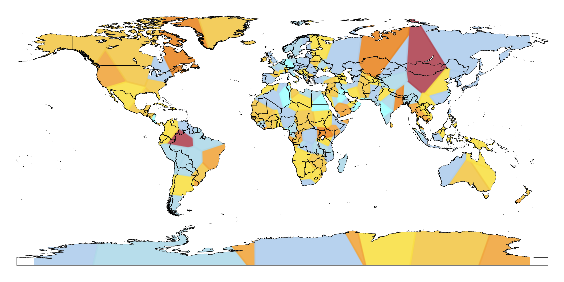

In [1]:
# CHLOROPLETH GRAPH BREAKDOWN
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import fnmatch
import numpy as np
import scipy
from matplotlib.patches import Polygon
import shapely
import matplotlib.image as image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox



#Read in data and plot where cities are
data_world = pd.read_csv('airpm2-5.csv', index_col=0, encoding='latin-1')
data_coord = pd.read_csv('CitiesCoOrd.csv', index_col=0, encoding='latin-1')
y = data_coord.iloc[0,1:239]
x = data_coord.iloc[1,1:239]
plt.scatter(x, y, label='Cities')

'''
#Draw lines between all of them
for (x1, y1), (x2, y2) in itertools.combinations(zip(x, y), 2):
    plt.plot([x1, x2], [y1, y2], color='black', linewidth=0.08)
'''

#FORCE LINE VORONOI TO HAVE THE SAME AXES AS MAP
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('City Position Test')
plt.grid(True)
plt.axhline(y=0, color='red', linestyle='--')
plt.axvline(x=0, color='red', linestyle='--')

#Creates and plots voronoi diagram(area where every point is closest to that point)
rows = data_coord.iloc[[1,0]]
points = rows.T.to_numpy()   
points_test = points[0:238]
vor = scipy.spatial.Voronoi(points_test)
scipy.spatial.voronoi_plot_2d(vor)
plt.xlim(-180,180)
plt.ylim(-90,90)

#Place polygon data in an array
polygons = []
for region in vor.regions:
    if not -1 in region and len(region) > 0:
        polygon = [vor.vertices[i] for i in region]
        polygons.append(polygon)

#Turn polygons into objects
shapely_polygons = [shapely.geometry.Polygon(p) for p in polygons]

#Plot voronoi with relevant colours
input_year = int(input('Which year of data do you want to graph(integer between 1850 and 2022)'))
search = input_year - 1850
fig, ax = plt.subplots()
ax = plt.gca()
plt.axis('off')
plt.xlim(-180,180)
plt.ylim(-90,90)
ax.set_aspect('equal')
counter = 0
for polygon in shapely_polygons:
    x, y = polygon.exterior.xy
    if data_world.iloc[search, counter] < 5.0:
        ax.fill(x, y, alpha = 0.9, color='#a4ffff')
    elif data_world.iloc[search, counter] >= 5.0 and data_world.iloc[search, counter] < 10.0 :
        ax.fill(x, y, alpha = 0.9, color='#b0dae9')
    elif data_world.iloc[search, counter] >= 10.0 and data_world.iloc[search, counter] < 15.0 :
        ax.fill(x, y, alpha = 0.9, color='#b0ceed')
    elif data_world.iloc[search, counter] >= 15.0 and data_world.iloc[search, counter] < 20.0 :
        ax.fill(x, y, alpha = 0.9, color='#F9E047')
    elif data_world.iloc[search, counter] >= 20.0 and data_world.iloc[search, counter] < 30.0 :
        ax.fill(x, y, alpha = 0.9, color='#f2c84b')
    elif data_world.iloc[search, counter] >= 30.0 and data_world.iloc[search, counter] < 40.0 :
        ax.fill(x, y, alpha = 0.9, color='#f1a63f')
    elif data_world.iloc[search, counter] >= 40.0 and data_world.iloc[search, counter] < 50.0 :
        ax.fill(x, y, alpha = 0.9, color='#E98725')
    elif data_world.iloc[search, counter] >= 50.0 and data_world.iloc[search, counter] < 60.0 :
        ax.fill(x, y, alpha = 0.9, color='#af4553')
    elif data_world.iloc[search, counter] >= 60.0 and data_world.iloc[search, counter] < 70.0 :
        ax.fill(x, y, alpha = 0.9, color='#863b47')
    elif data_world.iloc[search, counter] >= 70.0 and data_world.iloc[search, counter] < 80.0 :
        ax.fill(x, y, alpha = 0.9, color='#673a3d')
    elif data_world.iloc[search, counter] >= 80.0 and data_world.iloc[search, counter] < 90.0 :
        ax.fill(x, y, alpha = 0.9, color='#462f30')
    else:
        ax.fill(x, y, alpha = 0.9, color='#252424')
    counter = counter + 1

'''
RULES FOR PNG MAP USE
You are free:
to share – to copy, distribute and transmit the work
to remix – to adapt the work
Under the following conditions:
attribution – You must give appropriate credit, provide a link to the license, and indicate if changes were made.
You may do so in any reasonable manner, but not in any way that suggests the licensor endorses you or your use.
'''

#Plot map on top
world_map = image.imread('worldmap2.png')
#plt.imshow(world_map, extent=[-180,180,-90,90])
imagebox = OffsetImage(world_map, zoom = 0.16)
ab = AnnotationBbox(imagebox, (0, 0), frameon = False)
ax.add_artist(ab)
